In [30]:
import numpy
!.\Scripts\activate
# !pip install tensorflow
!echo %VIRTUAL_ENV%
# !pip install torch
!pip install keras-core
# !pip install numpy
# !pip install matplotlib

C:\Users\Jasiek\Desktop\main\EDU\EDU sem7\rozpoznawanie_obraz�"��"'w\lab3-GAN


In [304]:
import numpy as np
import os
from matplotlib import pyplot as plt
# plt.rcParams['image.cmap'] = 'gray'
os.environ["KERAS_BACKEND"] = "torch"
import keras_core as keras

In [305]:
LOADING_MODEL = False

In [306]:
augumentor = keras.models.Sequential([
  keras.layers.RandomFlip("horizontal"),
  keras.layers.RandomRotation(0.07),
  keras.layers.RandomZoom((-0.15, 0)),
])

augumentor.compile()
augumentor.summary()

Model: "sequential_53"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ random_flip_13 (RandomFlip)     │ ?                         │          0 │
│                                 │                           │  (unbuilt) │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ random_rotation_13              │ ?                         │          0 │
│ (RandomRotation)                │                           │  (unbuilt) │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ random_zoom_13 (RandomZoom)     │ ?                         │          0 │
│                                 │                           │  (unbuilt) │
└─────────────────────────────────┴───────────────────────────┴────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [307]:
IMG_SIZE = 64

In [308]:
if LOADING_MODEL == False:
    discriminator = keras.models.Sequential([
        keras.layers.Input((IMG_SIZE, IMG_SIZE, 3)),
        # augumentor,
        keras.layers.Conv2D(32, (4, 4), strides = 2, padding='same',
                            kernel_regularizer=keras.regularizers.L2(0.01), bias_regularizer=keras.regularizers.L2(0.01)),
        keras.layers.LeakyReLU(negative_slope=0.2),
        keras.layers.BatchNormalization(name="batchnorm1"),
        keras.layers.Conv2D(64, (4, 4), strides = 2, padding='same',
                            kernel_regularizer=keras.regularizers.L2(0.01), bias_regularizer=keras.regularizers.L2(0.01)),
        keras.layers.LeakyReLU(negative_slope=0.2),
        keras.layers.BatchNormalization(name="batchnorm2"),
        keras.layers.Conv2D(64, (4, 4), strides = 2, padding='same',
                            kernel_regularizer=keras.regularizers.L2(0.01), bias_regularizer=keras.regularizers.L2(0.01)),
        keras.layers.LeakyReLU(negative_slope=0.2),
        keras.layers.BatchNormalization(name="batchnorm3"),
        keras.layers.Dropout(0.2),
        keras.layers.Flatten(),
        keras.layers.Dense(1, activation='sigmoid')
    ])

    discriminator.compile()
    discriminator.summary()

Model: "sequential_54"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ conv2d_52 (Conv2D)              │ (None, 32, 32, 32)        │      1,568 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ leaky_re_lu_78 (LeakyReLU)      │ (None, 32, 32, 32)        │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ batchnorm1 (BatchNormalization) │ (None, 32, 32, 32)        │        128 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv2d_53 (Conv2D)              │ (None, 16, 16, 64)        │     32,832 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ leaky_re_lu_79 (LeakyReLU)      │ (None, 16, 16, 64)        │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ batchnorm2 (BatchNormalization) │ (None, 16, 16, 64)        │        256 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv2d_54 (Conv2D)              │ (None, 8, 8, 64)          │     65,600 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ leaky_re_lu_80 (LeakyReLU)      │ (None, 8, 8, 64)          │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ batchnorm3 (BatchNormalization) │ (None, 8, 8, 64)          │        256 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_13 (Dropout)            │ (None, 8, 8, 64)          │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ flatten_13 (Flatten)            │ (None, 4096)              │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_26 (Dense)                │ (None, 1)                 │      4,097 │
└─────────────────────────────────┴───────────────────────────┴────────────┘

 Total params: 104,737 (409.13 KB)

 Trainable params: 104,417 (407.88 KB)

 Non-trainable params: 320 (1.25 KB)

In [309]:
GEN_INPUT_SIZE = IMG_SIZE * 2

@keras.saving.register_keras_serializable()
def toRGB(x):
    return (x+1)/2

if LOADING_MODEL == False:
    generator = keras.models.Sequential([
        keras.layers.Input((GEN_INPUT_SIZE,)),
        keras.layers.Dense((IMG_SIZE//8)**2 * 64),
        keras.layers.Reshape((IMG_SIZE//8, IMG_SIZE//8, 64)),
        keras.layers.Conv2DTranspose(64, (4, 4), strides=2, padding="same",),
        keras.layers.LeakyReLU(negative_slope=0.2),
        keras.layers.Conv2DTranspose(128, (4, 4), strides=2, padding="same"),
        keras.layers.LeakyReLU(negative_slope=0.2),
        keras.layers.Conv2DTranspose(256, (4, 4), strides=2, padding="same"),
        keras.layers.LeakyReLU(negative_slope=0.2),
        keras.layers.Conv2D(3, (5, 5), padding="same", activation='tanh'),
        keras.layers.Lambda(toRGB),
    ])

    generator.compile()
    generator.summary()

Model: "sequential_55"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ dense_27 (Dense)                │ (None, 4096)              │    528,384 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ reshape_13 (Reshape)            │ (None, 8, 8, 64)          │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv2d_transpose_39             │ (None, 16, 16, 64)        │     65,600 │
│ (Conv2DTranspose)               │                           │            │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ leaky_re_lu_81 (LeakyReLU)      │ (None, 16, 16, 64)        │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv2d_transpose_40             │ (None, 32, 32, 128)       │    131,200 │
│ (Conv2DTranspose)               │                           │            │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ leaky_re_lu_82 (LeakyReLU)      │ (None, 32, 32, 128)       │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv2d_transpose_41             │ (None, 64, 64, 256)       │    524,544 │
│ (Conv2DTranspose)               │                           │            │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ leaky_re_lu_83 (LeakyReLU)      │ (None, 64, 64, 256)       │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv2d_55 (Conv2D)              │ (None, 64, 64, 3)         │     19,203 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ lambda_13 (Lambda)              │ (None, 64, 64, 3)         │          0 │
└─────────────────────────────────┴───────────────────────────┴────────────┘

 Total params: 1,268,931 (4.84 MB)

 Trainable params: 1,268,931 (4.84 MB)

 Non-trainable params: 0 (0.00 B)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
0.52198803 0.4802683
(1, 64, 64, 3)


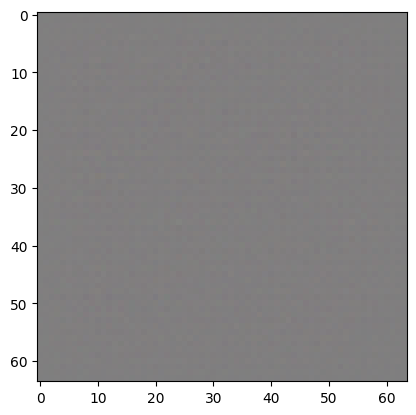

In [310]:
if LOADING_MODEL == False:
    random_input = np.random.normal(0, 1, (1, GEN_INPUT_SIZE))
    # print(random_input)
    out = generator.predict(random_input)

    print(np.max(out), np.min(out))
    print(out.shape)
    # print(out[0])
    plt.imshow(out[0])
    plt.show()


In [311]:
import multiprocessing.pool
import tensorflow
import os
real_dataset = keras.utils.image_dataset_from_directory(
    "data\\improved_cakes",
    labels=None,
    label_mode=None,
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=None,
)



Found 1436 files belonging to 1 classes.


In [312]:
real_data = np.array(list(real_dataset))/255
# real_data.
# tensorflow.data.Dataset.as_numpy_iterator(
# )

(1436, 64, 64, 3)
[[[0.99313724 0.46372548 0.15392157]
  [1.         0.4598039  0.14215687]
  [0.9862745  0.45294118 0.15      ]
  ...
  [0.83431375 0.85294116 0.92941177]
  [0.8333333  0.8509804  0.9284314 ]
  [0.845098   0.85784316 0.93333334]]

 [[1.         0.39215687 0.04509804]
  [1.         0.3754902  0.04215686]
  [1.         0.35196078 0.0382353 ]
  ...
  [0.83235294 0.85490197 0.9264706 ]
  [0.8382353  0.8519608  0.92745095]
  [0.84313726 0.85294116 0.93235296]]

 [[1.         0.37254903 0.03235294]
  [1.         0.38333333 0.03529412]
  [0.9843137  0.33137256 0.02254902]
  ...
  [0.83431375 0.8598039  0.922549  ]
  [0.8362745  0.8509804  0.93039215]
  [0.84117645 0.8568627  0.9352941 ]]

 ...

 [[0.90588236 0.90294117 0.9558824 ]
  [0.8960784  0.90294117 0.9490196 ]
  [0.8980392  0.8960784  0.9431372 ]
  ...
  [0.9578431  0.95392156 0.9823529 ]
  [0.9588235  0.9558824  0.9843137 ]
  [0.9607843  0.95686275 0.9843137 ]]

 [[0.904902   0.90882355 0.9588235 ]
  [0.90686274 0.901

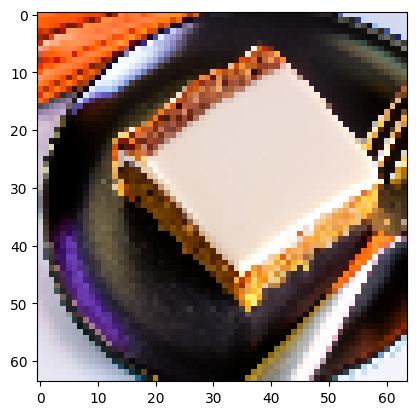

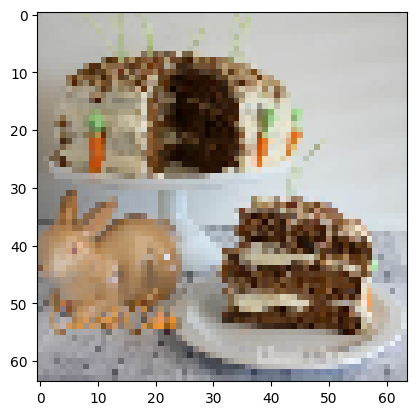

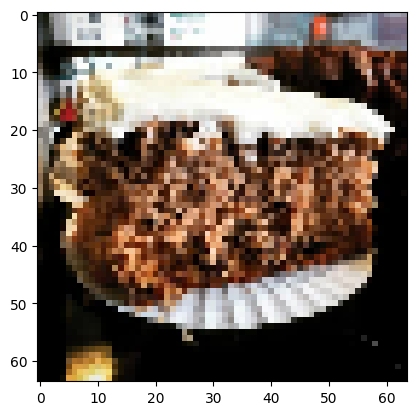

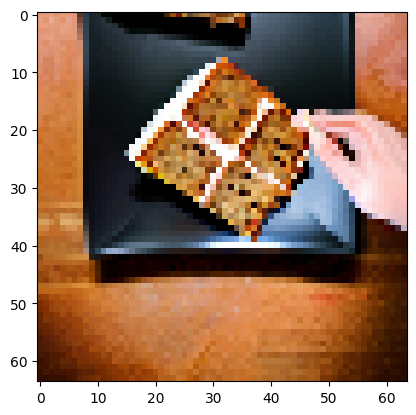

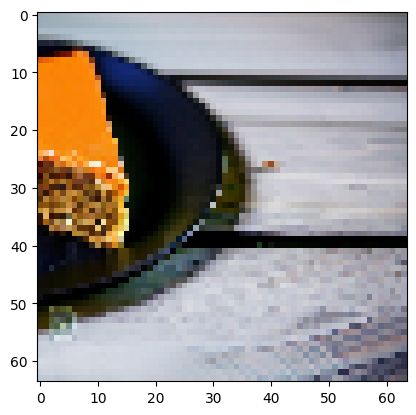

In [313]:
print(real_data.shape)
print(real_data[0])
for i in range(5):
    plt.imshow(real_data[i])
    plt.show()

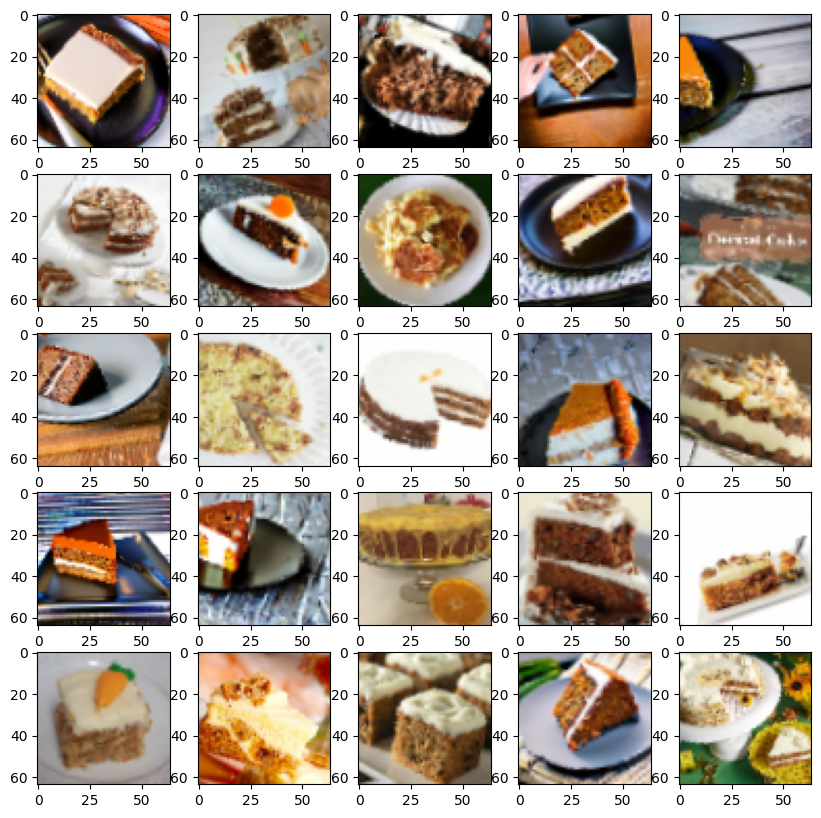

In [314]:
augumentor_tester = keras.models.Sequential([
    keras.layers.Input((IMG_SIZE, IMG_SIZE, 3)),
    augumentor,
])
augumentor_tester.compile()
augumented_example = augumentor_tester(real_data[:25])

imgs = augumented_example.cpu()
_, axs = plt.subplots(5, 5, figsize=(10, 10))
axs = axs.flatten()
for img, ax in zip(imgs, axs):
    ax.imshow(img)
plt.show()

In [315]:
real_data = np.append(real_data, augumentor_tester(real_data).cpu(), axis=0)
real_data.shape

(2872, 64, 64, 3)


Note that layers (such that BatchNorm) do the learning in forward phase, so you have to set them to eval() too

In [316]:
import torch
BATCH_SIZE = 32

y_real_data = np.ones(len(real_data))

real_dataset = torch.utils.data.TensorDataset(
    torch.from_numpy(real_data), torch.from_numpy(y_real_data)
)

real_dataloader = torch.utils.data.DataLoader(
    real_dataset, batch_size=BATCH_SIZE//2, shuffle=True
)



In [317]:
def check_weights_change(org_dirscr_weights, org_gen_weights, discriminator_training: bool):
    if discriminator_training:
        print("discriminator training")
        if False not in [(org_dirscr_weights[i] == discriminator.get_weights()[i]).all() for i in range(len(org_dirscr_weights))]:
            print('WARNING the discriminator weights did not change')
        else:
            print("good, the discriminator weights changed")
        if False not in [(org_gen_weights[i] == generator.get_weights()[i]).all() for i in range(len(org_gen_weights))]:
            print('good, the generator weights did not change')
        else:
            print("WARNING the generator weights layer changed")
    else:
        print("generator training")
        if False not in [(org_dirscr_weights[i] == discriminator.get_weights()[i]).all() for i in range(len(org_dirscr_weights))]:
            print('good, the discriminator weights did not change')
        else:
            print("WARNING the discriminator weights changed")
        if False not in [(org_gen_weights[i] == generator.get_weights()[i]).all() for i in range(len(org_gen_weights))]:
            print('WARNING the generator weights did not change')
        else:
            print("good, the generator weights layer changed")

In [318]:
if LOADING_MODEL == False:
    discriminator.compile(optimizer=keras.optimizers.Adam(learning_rate=0.000003), loss=keras.losses.BinaryCrossentropy())
    generator.compile(optimizer=keras.optimizers.Adam(learning_rate=0.000025), loss=keras.losses.BinaryCrossentropy())

In [319]:
validation_input = np.random.default_rng(seed = 420).normal(0, 1, (25, GEN_INPUT_SIZE))

In [320]:
from datetime import datetime

def train_disciminator(real_inputs, real_targets, step):
    discriminator.get_layer("batchnorm1").trainable = True
    discriminator.get_layer("batchnorm2").trainable = True
    discriminator.get_layer("batchnorm3").trainable = True
    discriminator.compile(optimizer=discriminator.optimizer)
    random_inputs = np.random.normal(0, 1, (BATCH_SIZE//2, GEN_INPUT_SIZE))
    generated_inputs = generator(random_inputs)

    x_train = keras.ops.append(real_inputs, generated_inputs, axis = 0)
    y_train = keras.ops.append(
        real_targets - np.random.uniform(0, 0.05, real_targets.shape),
        np.random.uniform(0, 0.05, len(generated_inputs)),
        axis=0)

    # sum_loss = 0
    # for x_train, y_train in ((real_inputs, real_targets - np.random.uniform(0, 0.05, real_targets.shape)),
    #                         (generated_inputs, np.random.uniform(0, 0.05, len(generated_inputs)))):
    outputs = discriminator(x_train)
    # print("dicr training d out: ", outputs)
    loss = discriminator.loss(y_train, outputs)
    if step == 0:
        print("discr training d out: ", outputs)

    discriminator.zero_grad()
    trainable_weights = [v for v in discriminator.trainable_weights]

    loss.backward()
    gradients = [v.value.grad for v in trainable_weights]

    with torch.no_grad():
        discriminator.optimizer.apply(gradients, trainable_weights)

        # sum_loss += loss

    return loss/2
    # return loss/2

def train_generator(step):
    discriminator.get_layer("batchnorm1").trainable = False
    discriminator.get_layer("batchnorm2").trainable = False
    discriminator.get_layer("batchnorm3").trainable = False
    discriminator.compile(optimizer=discriminator.optimizer)
    random_inputs = np.random.normal(0, 1, (BATCH_SIZE//2, GEN_INPUT_SIZE))
    x_gen_train = generator(random_inputs)
    y_gen_train = np.ones(len(x_gen_train))

    outputs = discriminator(x_gen_train)
    loss = generator.loss(y_gen_train, outputs)
    if step == 0:
        print("genr training d out: ", outputs)

    generator.zero_grad()
    trainable_weights = [v for v in generator.trainable_weights]

    loss.backward()
    gradients = [v.value.grad for v in trainable_weights]

    with torch.no_grad():
        generator.optimizer.apply(gradients, trainable_weights)

    return loss

In [321]:
# if LOADING_MODEL == False:
#     discriminator.optimizer.learning_rate.assign(0.00001/2)
#     discriminator.optimizer.learning_rate

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
0.52241194 0.47816893
(1, 64, 64, 3)


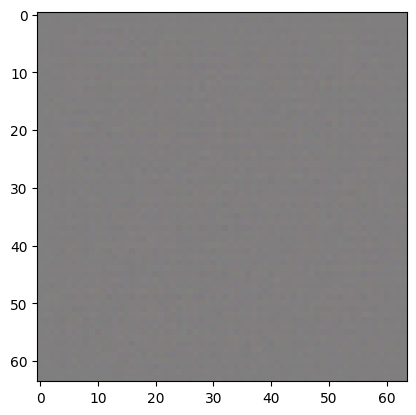

In [322]:
if LOADING_MODEL == True:
    generator = keras.saving.load_model("training\\models64\\generator64_120_07-11-2023_20-17-19.keras")
    discriminator = keras.saving.load_model("training\\models64\\discriminator64_120_07-11-2023_20-17-19.keras")
random_input = np.random.normal(0, 1, (1, GEN_INPUT_SIZE))
# print(random_input)
out = generator.predict(random_input)

print(np.max(out), np.min(out))
print(out.shape)
# print(out[0])
plt.imshow(out[0])
plt.show()

discr training d out:  tensor([[0.4973],
        [0.4848],
        [0.4644],
        [0.4938],
        [0.4999],
        [0.5092],
        [0.4883],
        [0.5007],
        [0.5020],
        [0.4921],
        [0.4755],
        [0.4956],
        [0.4953],
        [0.4936],
        [0.4998],
        [0.4739],
        [0.4984],
        [0.4987],
        [0.4985],
        [0.4986],
        [0.4987],
        [0.4986],
        [0.4983],
        [0.4985],
        [0.4986],
        [0.4987],
        [0.4983],
        [0.4986],
        [0.4985],
        [0.4985],
        [0.4988],
        [0.4985]], device='cuda:0', grad_fn=<SigmoidBackward0>)
genr training d out:  tensor([[0.4985],
        [0.4984],
        [0.4987],
        [0.4984],
        [0.4986],
        [0.4987],
        [0.4986],
        [0.4986],
        [0.4987],
        [0.4983],
        [0.4985],
        [0.4984],
        [0.4985],
        [0.4984],
        [0.4986],
        [0.4984]], device='cuda:0', grad_fn=<SigmoidBackward0>)

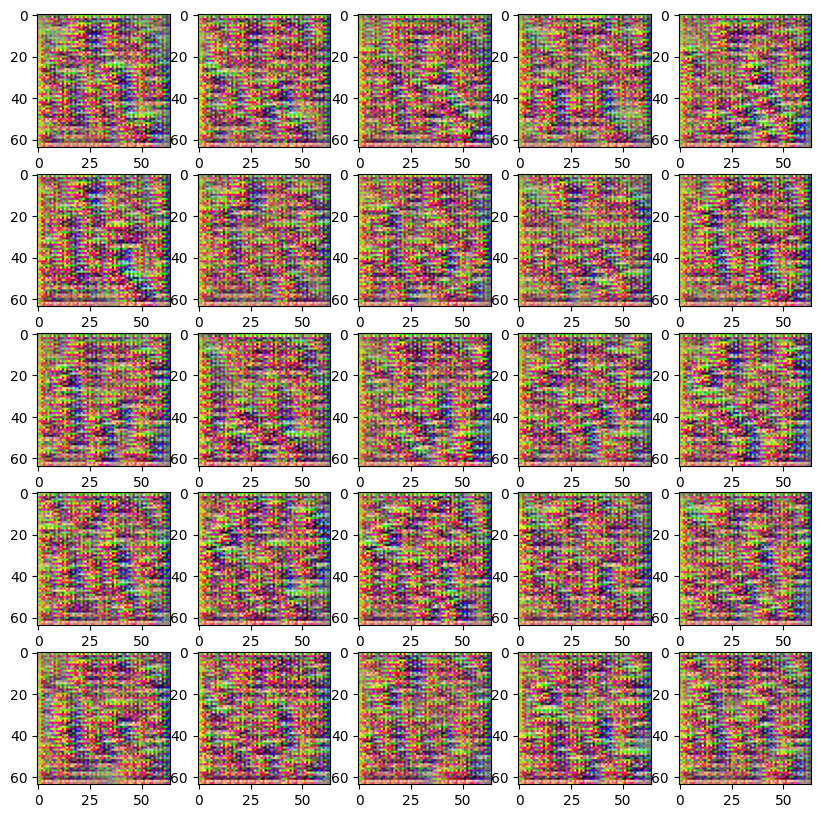

discr training d out:  tensor([[0.4870],
        [0.5043],
        [0.5203],
        [0.4879],
        [0.5002],
        [0.4796],
        [0.4695],
        [0.4891],
        [0.4641],
        [0.5075],
        [0.4844],
        [0.4815],
        [0.4917],
        [0.4876],
        [0.4849],
        [0.4977],
        [0.5484],
        [0.5539],
        [0.5587],
        [0.5359],
        [0.5457],
        [0.5183],
        [0.5465],
        [0.5461],
        [0.5457],
        [0.5453],
        [0.5372],
        [0.5394],
        [0.5495],
        [0.5582],
        [0.5430],
        [0.5591]], device='cuda:0', grad_fn=<SigmoidBackward0>)
genr training d out:  tensor([[0.5783],
        [0.5530],
        [0.5621],
        [0.5580],
        [0.5355],
        [0.5696],
        [0.5617],
        [0.5372],
        [0.5505],
        [0.5523],
        [0.5274],
        [0.5492],
        [0.5356],
        [0.5471],
        [0.5766],
        [0.5561]], device='cuda:0', grad_fn=<SigmoidBackward0>)

In [ ]:

CHECK_WEIGHTS = False

for epoch in range(151, 3001):
    gen_losses = []
    discr_losses = []
    for step, (real_inputs, real_targets) in enumerate(real_dataloader):
        if CHECK_WEIGHTS and step < 2 and epoch == 1:
            print(step)
            org_dirscr_weights = discriminator.get_weights()
            org_gen_weights = generator.get_weights()

        discr_losses.append(train_disciminator(real_inputs, real_targets, step).cpu().detach().numpy())

        if CHECK_WEIGHTS and step < 2 and epoch == 1:
            check_weights_change(org_dirscr_weights, org_gen_weights, True)
            org_dirscr_weights = discriminator.get_weights()
            org_gen_weights = generator.get_weights()

        gen_losses.append(train_generator(step).cpu().detach().numpy())

        if CHECK_WEIGHTS and step < 2 and epoch == 1:
            check_weights_change(org_dirscr_weights, org_gen_weights, False)

    print(f"epoch {epoch}")
    print(f"Generator avg loss:     {np.mean(gen_losses)}")
    print(f"Discriminator avg loss: {np.mean(discr_losses)}")


    now = datetime.now()
    time = now.strftime('%d-%m-%Y_%H-%M-%S')
    if epoch%50 == 0:
        generator.save(f"training\\models64\\generator64_{epoch}_{time}.keras")
        discriminator.save(f"training\\models64\\discriminator64_{epoch}_{time}.keras")

    if epoch <= 20 or (epoch%20 == 0 and epoch <= 500) or epoch%50 == 0:
        imgs = generator.predict(validation_input)
        _, axs = plt.subplots(5, 5, figsize=(10, 10))
        axs = axs.flatten()
        for img, ax in zip(imgs, axs):
            ax.imshow(img)
        plt.savefig(f"training\\results64\\imgs64_{epoch}_{time}.png")
        plt.show()


In [ ]:
# discriminator.get_layer("batch_normalization_3").trainable = False
# discriminator.get_layer("batch_normalization_4").trainable = False
# discriminator.get_layer("batch_normalization_5").trainable = False
# discriminator.compile()

In [ ]:
# random_inputs = np.random.normal(0, 1, (BATCH_SIZE//2, GEN_INPUT_SIZE))
# generated_inputs = generator(random_inputs)
#
# x_train = keras.ops.append(real_inputs, generated_inputs, axis = 0)
# # y_train = keras.ops.append(
# #     real_targets - np.random.uniform(0, 0.05, real_targets.shape),
# #     np.random.uniform(0, 0.05, len(generated_inputs)),
# #     axis=0)
# # y_train += np.random.uniform(-0.05, 0.05, y_train.shape)
# # random_ixing = np.random.permutation(len(x_train))
# # x_train = x_train[random_ixing]
# # y_train = y_train[random_ixing]
# outputs = discriminator(x_train)
#
# print("dicr training d out: ", outputs)
# # x_gen_train = generator(random_inputs)
# # y_gen_train = np.ones(len(x_gen_train))
#
# outputs = discriminator(generated_inputs)
# print("genr training d out: ", outputs)
#


In [ ]:
# real_inputs.shape